<a href="https://colab.research.google.com/github/gkianfar/DemCare-Analysis/blob/main/DemCare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essential packages

In [43]:
pip install matplotlib-venn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set directory path
dir_path = '/content/drive/MyDrive/DemCare/D10'

# List the files in the directory
files = [f for f in os.listdir(dir_path)]

# Print the subfolders
print(files)

['MovingIntensity.csv', 'Motion.csv', 'Short_sessions.csv', 'Plugs.csv']


Motion file

In [37]:
dir_path = '/content/drive/MyDrive/DemCare/D10'
file_name = 'Motion.csv'
file_path = os.path.join(dir_path, file_name)
df_motion = pd.read_csv(file_path,sep=';', quotechar='"')
df_motion

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-04-03 13:22:59.031,670,2015-04-03 13:22:43.349,PhoneMoved,2015-04-03,15,0,1,TagSensors
1,2015-04-03 13:23:47.174,670,2015-04-03 13:23:41.915,PillOrganizerMoved,2015-04-03,5,0,1,TagSensors
2,2015-04-03 13:41:42.010,670,2015-04-03 13:41:41.056,PhoneMoved,2015-04-03,0,0,1,TagSensors
3,2015-04-03 13:41:57.929,670,2015-04-03 13:41:56.929,PhoneMoved,2015-04-03,1,0,1,TagSensors
4,2015-04-03 13:42:31.107,670,2015-04-03 13:42:30.107,PhoneMoved,2015-04-03,1,0,1,TagSensors
...,...,...,...,...,...,...,...,...,...
6920,2015-07-14 15:25:52.852,772,2015-07-14 15:25:51.852,KettleMoved,2015-07-14,1,0,1,TagSensors
6921,2015-07-14 15:26:50.358,772,2015-07-14 15:26:34.534,PhoneMoved,2015-07-14,15,0,1,TagSensors
6922,2015-07-14 15:27:17.485,772,2015-07-14 15:27:08.076,PhoneMoved,2015-07-14,9,0,1,TagSensors
6923,2015-07-14 15:29:03.494,772,2015-07-14 15:28:12.195,CupMoved,2015-07-14,51,0,1,TagSensors


<Figure size 1200x600 with 0 Axes>

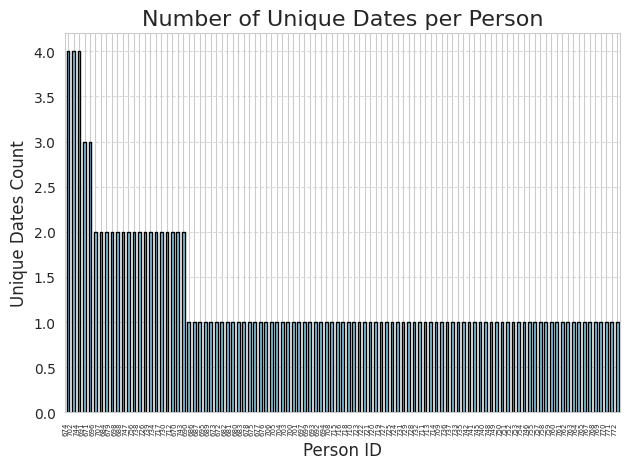

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by person_id and count unique dates, then sort
df_counts = df_motion.groupby('person_id').agg(date_count=('date', lambda x: x.nunique()))
df_counts = df_counts.sort_values('date_count', ascending=False)

# Set seaborn style for beauty
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))
ax = df_counts.plot.bar(
    y='date_count',
    legend=False,
    color='skyblue',
    edgecolor='black'
)

# Beautify
plt.title('Number of Unique Dates per Person', fontsize=16)
plt.xlabel('Person ID', fontsize=12)
plt.ylabel('Unique Dates Count', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=5)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Number of people and types of devices

In [39]:
# Number of people
n_people = df_motion['person_id'].nunique()
n_type = df_motion['type'].nunique()
print(f'Number of people: {n_people}')
print(f'Number of types of devices: {n_type}')
#

Number of people: 101
Number of types of devices: 9


In [24]:
df_motion['type'].unique()

array(['PhoneMoved', 'PillOrganizerMoved', 'DrugBox1Moved',
       'DrugBox2Moved', 'TeaBagMoved', 'KettleMoved', 'CupMoved',
       'DrugBox3Moved', 'FolderMoved'], dtype=object)

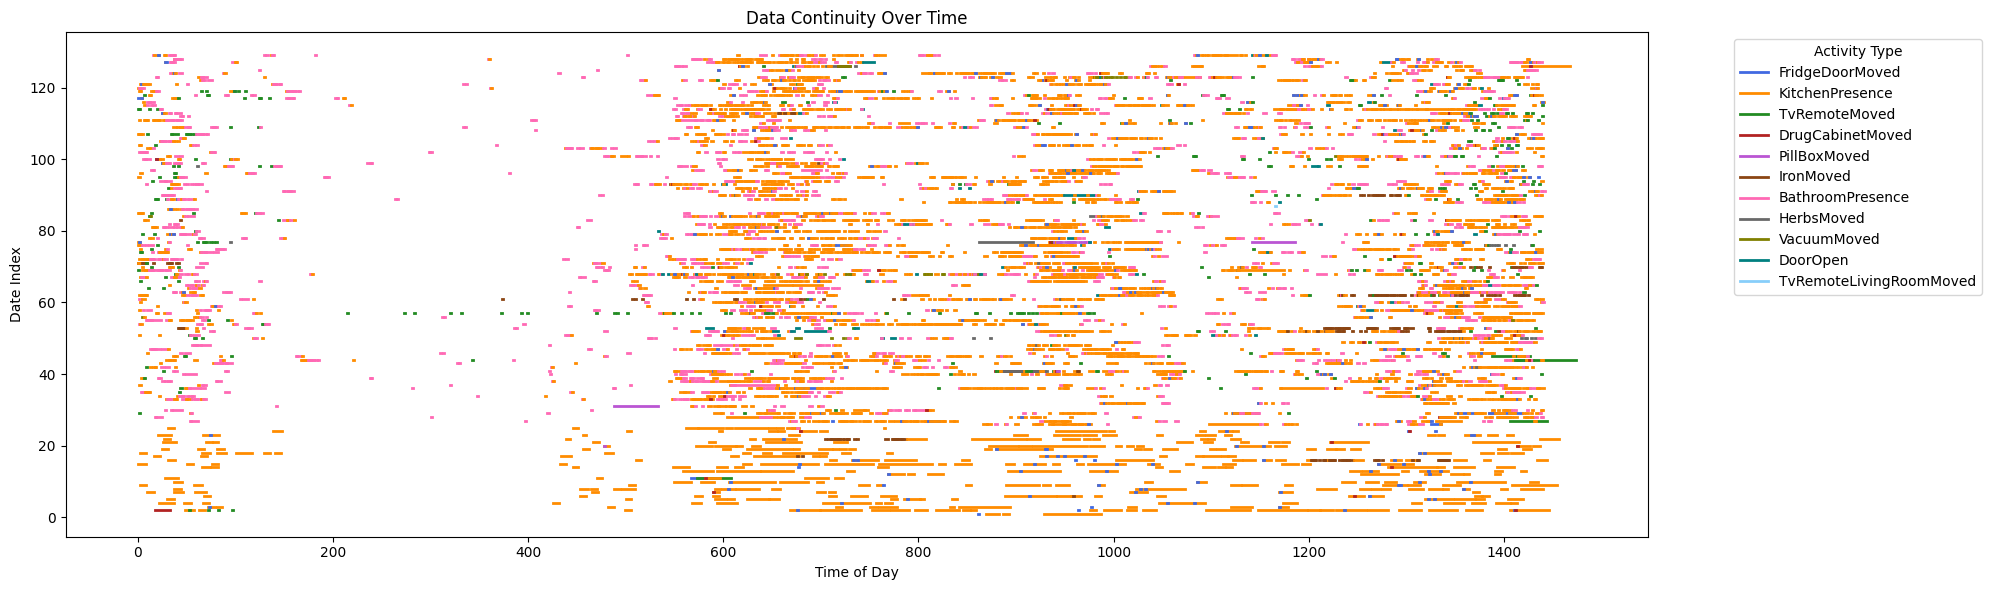

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to datetime
df_motion['start_time'] = pd.to_datetime(df_motion['start_time'])
df_motion['end_time'] = pd.to_datetime(df_motion['end_time'])
df_motion['date'] = pd.to_datetime(df_motion['date']).dt.date
all_dates = sorted(df_motion['date'].unique())

# Initiate figure
plt.figure(figsize=(20, 6))

used_labels = set()  # Moved here!

for d_idx, day in enumerate(all_dates):
    selected_date = pd.to_datetime(day).date()
    df_day = df_motion[df_motion['date'] == selected_date].copy()

    df_day['start_minutes'] = df_day['start_time'].dt.hour * 60 + df_day['start_time'].dt.minute
    df_day['end_minutes'] = df_day['end_time'].dt.hour * 60 + df_day['end_time'].dt.minute
    df_day.loc[df_day['end_minutes'] < df_day['start_minutes'], 'end_minutes'] += 1440

    color = {
        'FridgeDoorMoved': 'royalblue',
        'KitchenPresence': 'darkorange',
        'TvRemoteMoved': 'forestgreen',
        'DrugCabinetMoved': 'firebrick',
        'PillBoxMoved': 'mediumorchid',
        'IronMoved': 'saddlebrown',
        'BathroomPresence': 'hotpink',
        'HerbsMoved': 'dimgray',
        'VacuumMoved': 'olive',
        'DoorOpen': 'teal',
        'TvRemoteLivingRoomMoved': 'lightskyblue'
    }

    for i, row in df_day.iterrows():
        label = row['type'] if row['type'] not in used_labels else None
        used_labels.add(row['type'])

        plt.plot(
            [row['start_minutes'], row['end_minutes']],
            [d_idx + 1, d_idx + 1],
            color=color.get(row['type'], 'black'),
            linewidth=2,
            label=label
        )

plt.xlabel('Time of Day')
plt.ylabel('Date Index')
plt.title('Data Continuity Over Time')

# Show legend only once per type
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Plugs

In [40]:
dir_path = '/content/drive/MyDrive/DemCare/D10'
file_name = 'Plugs.csv'
file_path = os.path.join(dir_path, file_name)
df_plugs = pd.read_csv(file_path,sep=';',quotechar='"')
df_plugs

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-04-03 13:24:14.060,670,2015-04-03 13:24:08.193,KettleOn,2015-04-03,5,0,1,SmartPlug
1,2015-04-03 13:45:07.397,670,2015-04-03 13:44:36.782,KettleOn,2015-04-03,30,0,1,SmartPlug
2,2015-04-08 13:12:51.240,671,2015-04-08 13:12:45.216,KettleOn,2015-04-08,6,0,1,SmartPlug
3,2015-04-08 13:20:05.324,671,2015-04-08 13:19:35.280,KettleOn,2015-04-08,30,0,1,SmartPlug
4,2015-04-08 13:47:38.214,672,2015-04-08 13:46:33.237,KettleOn,2015-04-08,64,0,1,SmartPlug
...,...,...,...,...,...,...,...,...,...
112,2015-07-08 16:52:15.938,762,2015-07-08 16:51:51.761,KettleOn,2015-07-08,24,0,1,SmartPlug
113,2015-07-08 16:56:05.717,762,2015-07-08 16:55:28.633,KettleOn,2015-07-08,37,0,1,SmartPlug
114,2015-07-14 09:39:09.148,763,2015-07-14 09:38:32.031,KettleOn,2015-07-14,37,0,1,SmartPlug
115,2015-07-14 09:42:29.456,763,2015-07-14 09:42:16.894,KettleOn,2015-07-14,12,0,1,SmartPlug


In [42]:
# Types of appliances
df_plugs['person_id'].nunique()

78

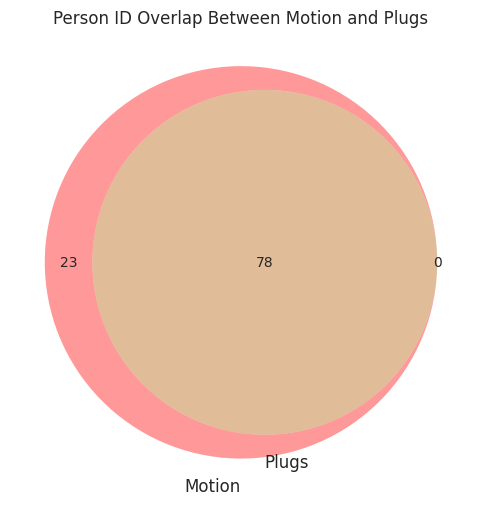

In [44]:
ids_motion = df_motion['person_id'].unique()
ids_plugs = df_plugs['person_id'].unique()

set_motion = set(ids_motion)
set_plugs = set(ids_plugs)

motion_only = set_motion - set_plugs
plugs_only = set_plugs - set_motion
both = set_motion & set_plugs

from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 6))
venn2(
    subsets=(len(motion_only), len(plugs_only), len(both)),
    set_labels=('Motion', 'Plugs')
)

plt.title('Person ID Overlap Between Motion and Plugs')
plt.show()


Moving Intensity

In [46]:
dir_path = '/content/drive/MyDrive/DemCare/D10'
file_name = 'MovingIntensity.csv'
file_path = os.path.join(dir_path, file_name)
df_movingintensity = pd.read_csv(file_path,sep=';',quotechar='"')
df_movingintensity

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-04-03 13:19:25.308,671,2015-04-03 13:19:15.317,MovingIntensity,2015-04-03,9,0,1,DTI_2,"32,63867"
1,2015-04-03 13:19:35.339,671,2015-04-03 13:19:25.348,MovingIntensity,2015-04-03,9,0,1,DTI_2,0
2,2015-04-03 13:19:45.370,671,2015-04-03 13:19:35.379,MovingIntensity,2015-04-03,9,0,1,DTI_2,0
3,2015-04-03 13:19:55.401,671,2015-04-03 13:19:45.410,MovingIntensity,2015-04-03,9,0,1,DTI_2,0
4,2015-04-03 13:20:05.432,671,2015-04-03 13:19:55.441,MovingIntensity,2015-04-03,9,0,1,DTI_2,0
...,...,...,...,...,...,...,...,...,...,...
17833,2015-07-14 14:55:22.118,772,2015-07-14 14:55:12.136,MovingIntensity,2015-07-14,9,0,1,DTI_2,0
17834,2015-07-14 14:55:32.141,772,2015-07-14 14:55:22.158,MovingIntensity,2015-07-14,9,0,1,DTI_2,0
17835,2015-07-14 14:55:42.164,772,2015-07-14 14:55:32.181,MovingIntensity,2015-07-14,9,0,1,DTI_2,0
17836,2015-07-14 14:55:52.187,772,2015-07-14 14:54:52.090,MovingIntensity,2015-07-14,60,0,1,DTI_2,"327,72266"


In [49]:
df_movingintensity['person_id'].unique()

array([671, 675, 673, 674, 677, 678, 679, 680, 681, 682, 683, 684, 686,
       688, 689, 691, 692, 693, 696, 697, 698, 699, 700, 701, 702, 703,
       705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717,
       718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730,
       731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743,
       744, 745, 746, 747, 748, 749, 751, 752, 753, 754, 755, 756, 757,
       758, 759, 760, 761, 762, 763, 764, 768, 770, 769, 771, 772])

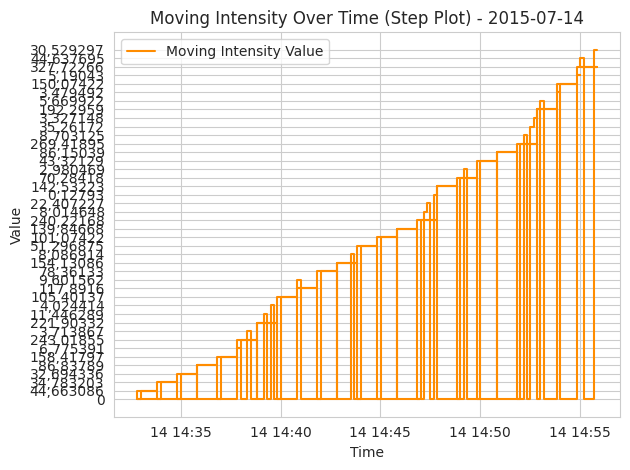

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

id_num = 772
select_date = '2015-07-14'

# Convert times
df_movingintensity['start_time'] = pd.to_datetime(df_movingintensity['start_time'])
df_movingintensity['end_time'] = pd.to_datetime(df_movingintensity['end_time'])

# Extract date column if needed
df_movingintensity['date'] = df_movingintensity['start_time'].dt.date.astype(str)

# Sort
df_movingintensity = df_movingintensity.sort_values('start_time')

# Filter
if id_num is not None:
    df_day = df_movingintensity[(df_movingintensity['person_id'] == id_num) &
                                (df_movingintensity['date'] == select_date)]
else:
    df_day = df_movingintensity[df_movingintensity['date'] == select_date]

if df_day.empty:
    print("No data found for the selected date and ID.")
else:
    # Build step plot data
    times = []
    values = []
    for _, row in df_day.iterrows():
        times.extend([row['start_time'], row['end_time']])
        values.extend([row['value'], row['value']])

    # Plot
    plt.figure()
    plt.step(times, values, where='post', label='Moving Intensity Value', color='darkorange')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Moving Intensity Over Time (Step Plot) - {select_date}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Night Sleep

In [ ]:
# Set file name
file_name = 'NightSleep.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_nightsleep = pd.read_csv(file_path,sep=';',quotechar='"')
df_nightsleep

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-18 09:39:00.000,10136,2015-02-18 09:16:00.000,NightSleep,2015-02-18,1380,0,1,Aura
1,2015-03-05 08:06:00.000,10136,2015-03-05 00:33:00.000,NightSleep,2015-03-05,27180,0,1,Aura
2,2015-03-05 09:18:00.000,10136,2015-03-05 08:17:00.000,NightSleep,2015-03-05,3660,0,1,Aura
3,2015-03-06 09:06:00.000,10136,2015-03-06 01:19:00.000,NightSleep,2015-03-06,28020,0,1,Aura
4,2015-03-07 10:16:00.000,10136,2015-03-07 01:50:00.000,NightSleep,2015-03-07,30360,0,1,Aura
...,...,...,...,...,...,...,...,...,...
140,2015-07-06 09:52:00.000,10136,2015-07-06 02:08:00.000,NightSleep,2015-07-06,27840,0,1,Aura
141,2015-07-07 09:01:00.000,10136,2015-07-07 00:00:00.000,NightSleep,2015-07-07,32460,0,1,Aura
142,2015-07-08 09:41:00.000,10136,2015-07-08 00:44:00.000,NightSleep,2015-07-08,32220,0,1,Aura
143,2015-07-09 09:26:00.000,10136,2015-07-09 00:49:00.000,NightSleep,2015-07-09,31020,0,1,Aura


In [ ]:
df_nightsleep.sort_values(by='start_time',inplace=True)
df_nightsleep

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-02-18 09:39:00.000,10136,2015-02-18 09:16:00.000,NightSleep,2015-02-18,1380,0,1,Aura
1,2015-03-05 08:06:00.000,10136,2015-03-05 00:33:00.000,NightSleep,2015-03-05,27180,0,1,Aura
2,2015-03-05 09:18:00.000,10136,2015-03-05 08:17:00.000,NightSleep,2015-03-05,3660,0,1,Aura
3,2015-03-06 09:06:00.000,10136,2015-03-06 01:19:00.000,NightSleep,2015-03-06,28020,0,1,Aura
4,2015-03-07 10:16:00.000,10136,2015-03-07 01:50:00.000,NightSleep,2015-03-07,30360,0,1,Aura
...,...,...,...,...,...,...,...,...,...
140,2015-07-06 09:52:00.000,10136,2015-07-06 02:08:00.000,NightSleep,2015-07-06,27840,0,1,Aura
141,2015-07-07 09:01:00.000,10136,2015-07-07 00:00:00.000,NightSleep,2015-07-07,32460,0,1,Aura
142,2015-07-08 09:41:00.000,10136,2015-07-08 00:44:00.000,NightSleep,2015-07-08,32220,0,1,Aura
143,2015-07-09 09:26:00.000,10136,2015-07-09 00:49:00.000,NightSleep,2015-07-09,31020,0,1,Aura


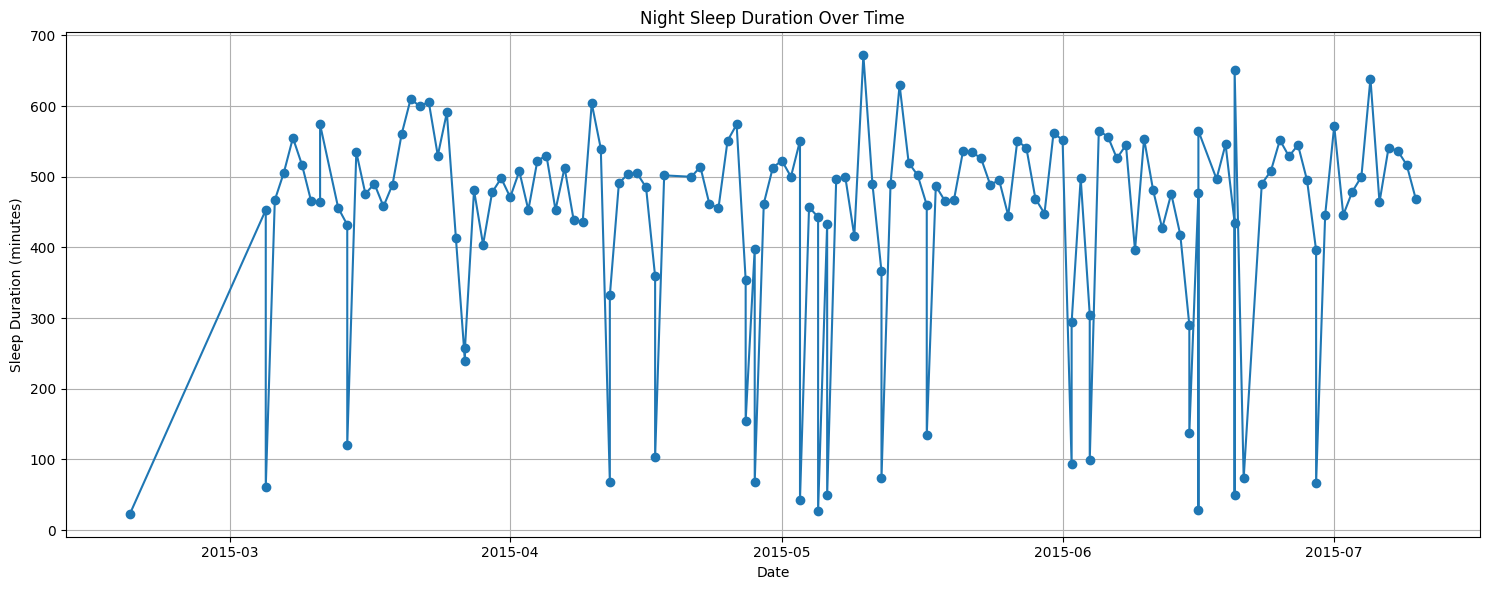

In [ ]:
# Convert to datetime
df_nightsleep['date'] = pd.to_datetime(df_nightsleep['date'])
df_nightsleep['duration_min'] = df_nightsleep['duration'] / 60  # convert seconds to minutes

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df_nightsleep['date'], df_nightsleep['duration_min'], marker='o', linestyle='-')
plt.title('Night Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


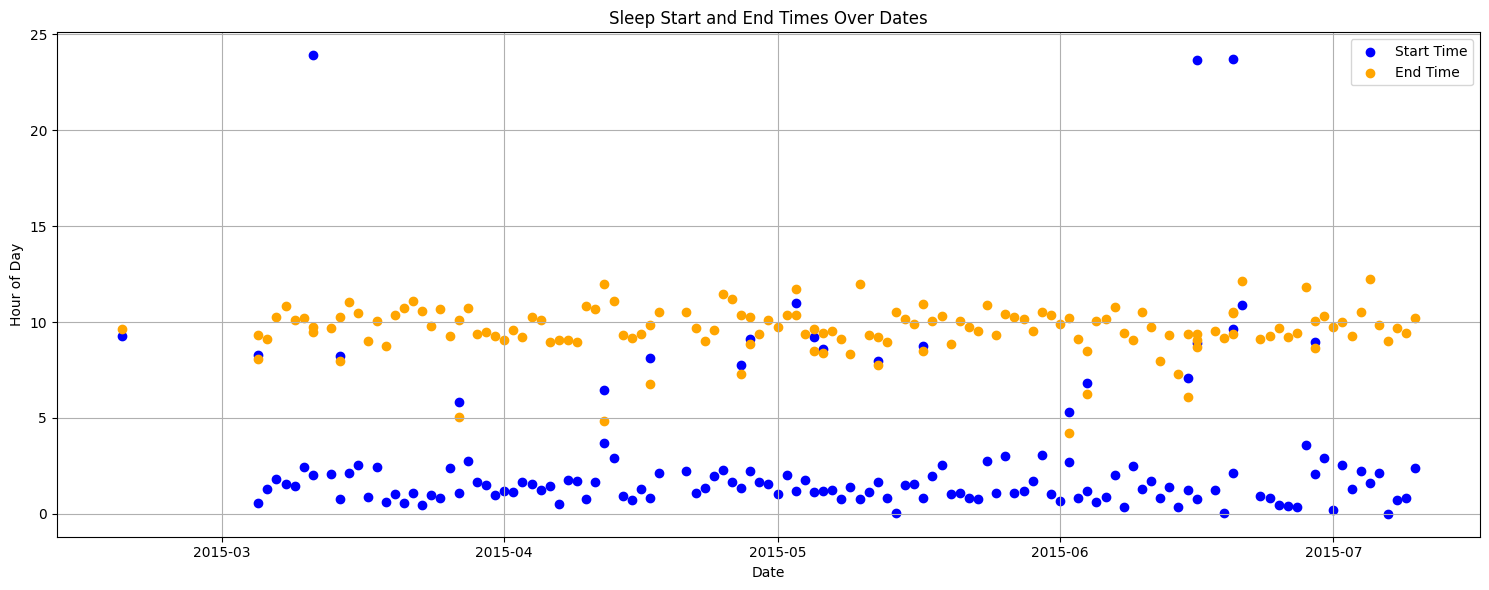

In [ ]:
df_nightsleep['start_time_of_day'] = pd.to_datetime(df_nightsleep['start_time']).dt.time
df_nightsleep['end_time_of_day'] = pd.to_datetime(df_nightsleep['end_time']).dt.time

plt.figure(figsize=(15, 6))
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['start_time']).dt.hour + pd.to_datetime(df_nightsleep['start_time']).dt.minute / 60,
            label='Start Time', color='blue')
plt.scatter(df_nightsleep['date'], pd.to_datetime(df_nightsleep['end_time']).dt.hour + pd.to_datetime(df_nightsleep['end_time']).dt.minute / 60,
            label='End Time', color='orange')

plt.title('Sleep Start and End Times Over Dates')
plt.ylabel('Hour of Day')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sleep Measurement

In [ ]:
# Set file name
dir_path = '/content/drive/MyDrive/DemCare/D12'
file_name = 'SleepMeasurements.csv'
file_path = os.path.join(dir_path, file_name)

# Read CSV file
df_sleepmeasurement = pd.read_csv(file_path,sep=';',quotechar='"')
df_sleepmeasurement

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider,value
0,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,NumberOfInterruptions,2015-05-13,19440,0,1,Aura,5
1,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,SleepLatency,2015-05-13,19440,0,1,Aura,960
2,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeAsleep,2015-05-13,19440,0,1,Aura,19440
3,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeDeepSleep,2015-05-13,19440,0,1,Aura,1800
4,2015-05-14 03:22:00.000,10137,2015-05-13 21:58:00.000,TotalTimeInBedButAwake,2015-05-13,19440,0,1,Aura,6120
...,...,...,...,...,...,...,...,...,...,...
715,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,SleepLatency,2015-09-30,33240,0,1,Aura,360
716,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeAsleep,2015-09-30,33240,0,1,Aura,33240
717,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeDeepSleep,2015-09-30,33240,0,1,Aura,8220
718,2015-10-01 07:16:00.000,10137,2015-09-30 22:02:00.000,TotalTimeInBedButAwake,2015-09-30,33240,0,1,Aura,4500


In [ ]:
# Types of measurements
df_sleepmeasurement['type'].unique()

array(['NumberOfInterruptions', 'SleepLatency', 'TotalTimeAsleep',
       'TotalTimeDeepSleep', 'TotalTimeInBedButAwake',
       'TotalTimeShallowSleep'], dtype=object)

In [ ]:
df_sleep_metrics = df_sleepmeasurement.pivot_table(
    index='date',
    columns='type',
    values='value',
    aggfunc='mean'  # or 'sum', 'median', 'max', etc., depending on your goal
)


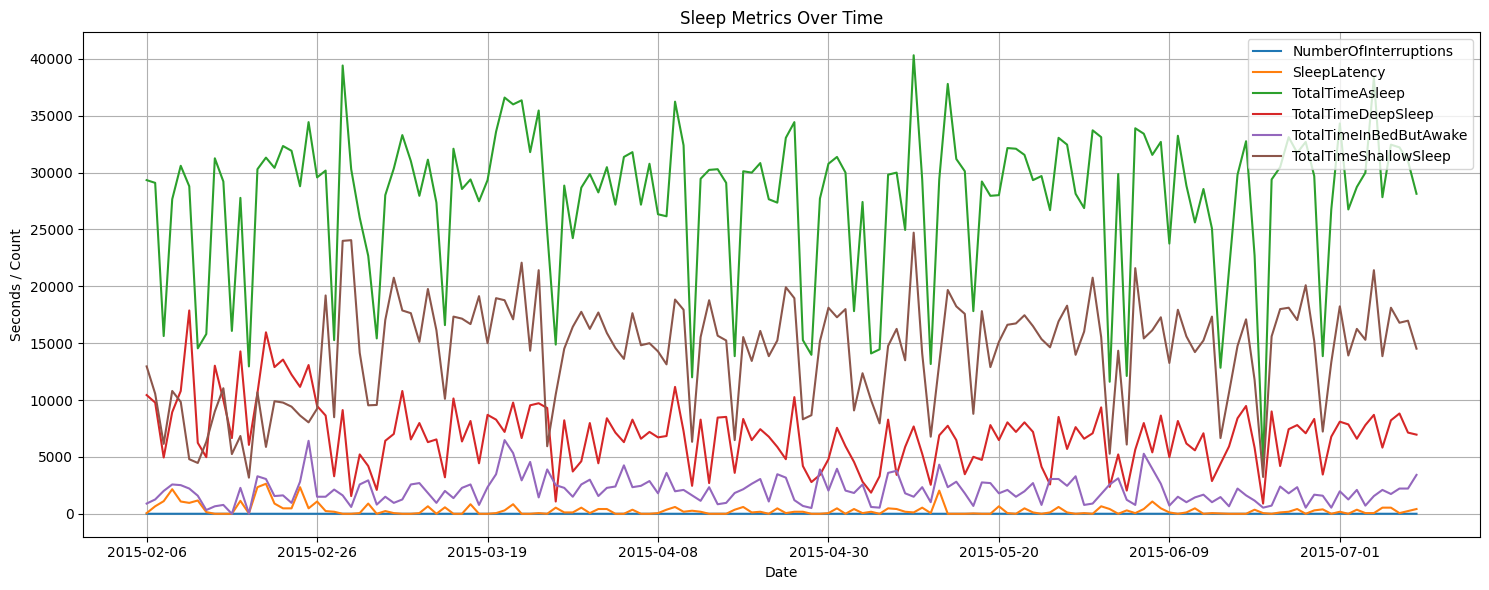

In [ ]:
import matplotlib.pyplot as plt

df_sleep_metrics.plot(figsize=(15, 6))
plt.title("Sleep Metrics Over Time")
plt.ylabel("Seconds / Count")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


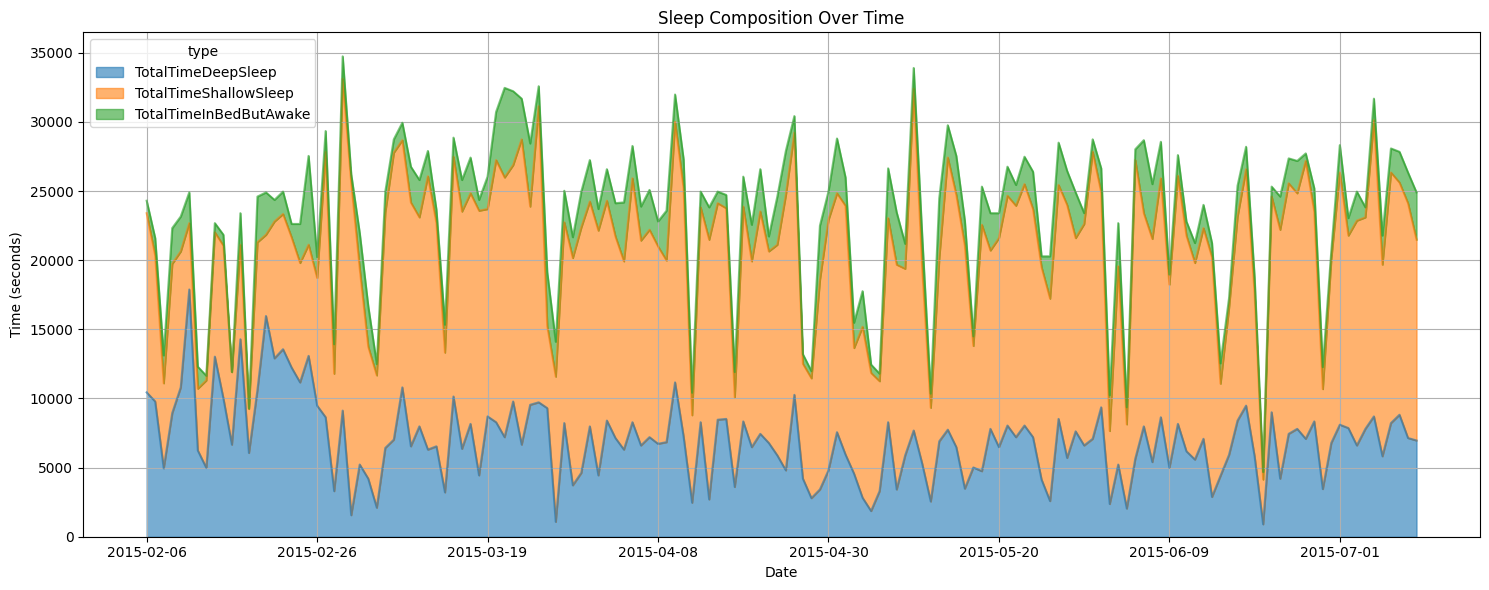

In [ ]:
df_sleep_metrics[['TotalTimeDeepSleep', 'TotalTimeShallowSleep', 'TotalTimeInBedButAwake']].plot.area(
    stacked=True, figsize=(15, 6), alpha=0.6
)
plt.title("Sleep Composition Over Time")
plt.ylabel("Time (seconds)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


Sleep Phases

In [ ]:
dir_path = '/content/drive/MyDrive/DemCare/D12'
file_name = 'SleepPhases.csv'
file_path = os.path.join(dir_path,file_name)
df_sleepphases = pd.read_csv(file_path,sep=';',quotechar='"')
df_sleepphases

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-05-13 22:14:00.000,10137,2015-05-13 21:58:00.000,Awake,2015-05-13,960,0,1,Aura
1,2015-05-13 22:43:00.000,10137,2015-05-13 22:14:00.000,LightSleep,2015-05-13,1740,0,1,Aura
2,2015-05-13 22:58:00.000,10137,2015-05-13 22:43:00.000,RemSleep,2015-05-13,900,0,1,Aura
3,2015-05-13 23:00:00.000,10137,2015-05-13 22:58:00.000,LightSleep,2015-05-13,120,0,1,Aura
4,2015-05-13 23:02:00.000,10137,2015-05-13 23:00:00.000,DeepSleep,2015-05-13,120,0,1,Aura
...,...,...,...,...,...,...,...,...,...
4499,2015-09-30 07:38:00.000,10137,2015-09-30 07:29:00.000,LightSleep,2015-09-30,540,0,1,Aura
4500,2015-09-30 07:48:00.000,10137,2015-09-30 07:38:00.000,RemSleep,2015-09-30,600,0,1,Aura
4501,2015-09-30 07:53:00.000,10137,2015-09-29 22:01:00.000,NightSleep,2015-09-29,35520,0,1,Aura
4502,2015-09-30 07:54:00.000,10137,2015-09-30 07:48:00.000,Awake,2015-09-30,360,0,1,Aura


In [ ]:
df_sleepphases['type'].unique()

array(['Awake', 'LightSleep', 'RemSleep', 'DeepSleep'], dtype=object)

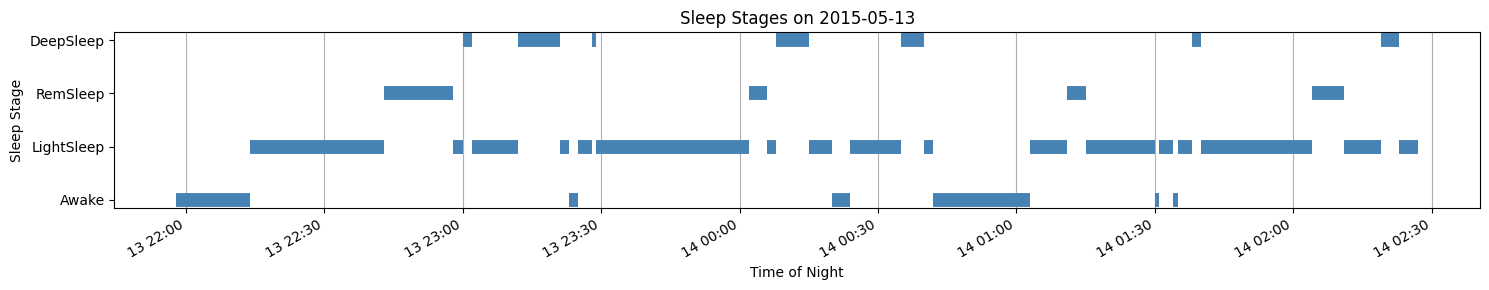

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the night you're interested in
selected_date = '2015-05-13'

df_select = df_sleepphases[
    (df_sleepphases['date'] == selected_date) &
    (df_sleepphases['type'] == 'NightSleep')
]

# Determine sleep time hours with corresponding dates
start = df_select.start_time.item()
end = df_select.end_time.item()
bool_condition = (
    (df_sleepphases['start_time'] <= end) &
    (df_sleepphases['start_time'] >= start) &
    (df_sleepphases['end_time'] <= end) &
    (df_sleepphases['end_time'] >= start)
)

df_day = df_sleepphases[bool_condition].copy()


# Convert times to datetime
df_day['start_time'] = pd.to_datetime(df_day['start_time'])
df_day['end_time'] = pd.to_datetime(df_day['end_time'])

# Define order and levels for sleep stages
sleep_stage_order = ['Awake', 'LightSleep', 'RemSleep', 'DeepSleep']
df_day['type'] = pd.Categorical(df_day['type'], categories=sleep_stage_order, ordered=True)

# Map stages to y positions
stage_to_y = {stage: i for i, stage in enumerate(sleep_stage_order)}
df_day['y'] = df_day['type'].map(stage_to_y)

# Plot
plt.figure(figsize=(15, 3))

for _, row in df_day.iterrows():
    plt.hlines(
        y=row['y'],
        xmin=row['start_time'],
        xmax=row['end_time'],
        color='steelblue',
        linewidth=10
    )

# Format plot
plt.yticks(list(stage_to_y.values()), list(stage_to_y.keys()))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time of Night')
plt.ylabel('Sleep Stage')
plt.title(f"Sleep Stages on {selected_date}")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
df_sleepphases[bool_condition].copy()

,end_time,person_id,start_time,type,date,duration,is_high_level,plausability,provider
0,2015-05-13 22:14:00.000,10137,2015-05-13 21:58:00.000,Awake,2015-05-13,960,0,1,Aura
1,2015-05-13 22:43:00.000,10137,2015-05-13 22:14:00.000,LightSleep,2015-05-13,1740,0,1,Aura
2,2015-05-13 22:58:00.000,10137,2015-05-13 22:43:00.000,RemSleep,2015-05-13,900,0,1,Aura
3,2015-05-13 23:00:00.000,10137,2015-05-13 22:58:00.000,LightSleep,2015-05-13,120,0,1,Aura
4,2015-05-13 23:02:00.000,10137,2015-05-13 23:00:00.000,DeepSleep,2015-05-13,120,0,1,Aura
5,2015-05-13 23:12:00.000,10137,2015-05-13 23:02:00.000,LightSleep,2015-05-13,600,0,1,Aura
6,2015-05-13 23:21:00.000,10137,2015-05-13 23:12:00.000,DeepSleep,2015-05-13,540,0,1,Aura
7,2015-05-13 23:23:00.000,10137,2015-05-13 23:21:00.000,LightSleep,2015-05-13,120,0,1,Aura
8,2015-05-13 23:25:00.000,10137,2015-05-13 23:23:00.000,Awake,2015-05-13,120,0,1,Aura
9,2015-05-13 23:28:00.000,10137,2015-05-13 23:25:00.000,LightSleep,2015-05-13,180,0,1,Aura


Short Session

In [59]:
dir_path = '/content/drive/MyDrive/DemCare/D10'
file_name = 'Short_sessions.csv'
file_path = os.path.join(dir_path,file_name)
df_shortsession = pd.read_csv(file_path,sep=';',quotechar='"')
df_shortsession

,id,startDate,endDate,birthDate,type,sex
0,670,2015-04-03 13:20:13.562,2015-04-03 14:19:01.438,1949-06-07,MCI,Female
1,671,2015-04-08 12:56:04.457,2015-04-08 13:37:03.703,1944-02-14,MCI,Female
2,673,2015-04-09 12:21:12.738,2015-04-09 12:57:52.194,1934-12-04,AD,Female
3,674,2015-04-09 13:03:50.040,2015-04-09 13:32:24.972,1946-07-05,MCI,Male
4,675,2015-04-14 10:36:21.809,2015-04-14 11:14:00.533,1934-06-05,MCI,Female
...,...,...,...,...,...,...
92,767,2015-07-14 11:31:36.677,2015-07-14 11:46:10.440,1950-01-01,AD,Female
93,768,2015-07-14 11:50:17.458,2015-07-14 12:14:14.905,1933-02-20,AD,Male
94,769,2015-07-14 12:17:49.649,2015-07-14 12:39:11.335,1950-01-01,AD,Female
95,770,2015-07-14 12:44:23.309,2015-07-14 13:11:27.046,1947-02-06,HEALTHY,Female


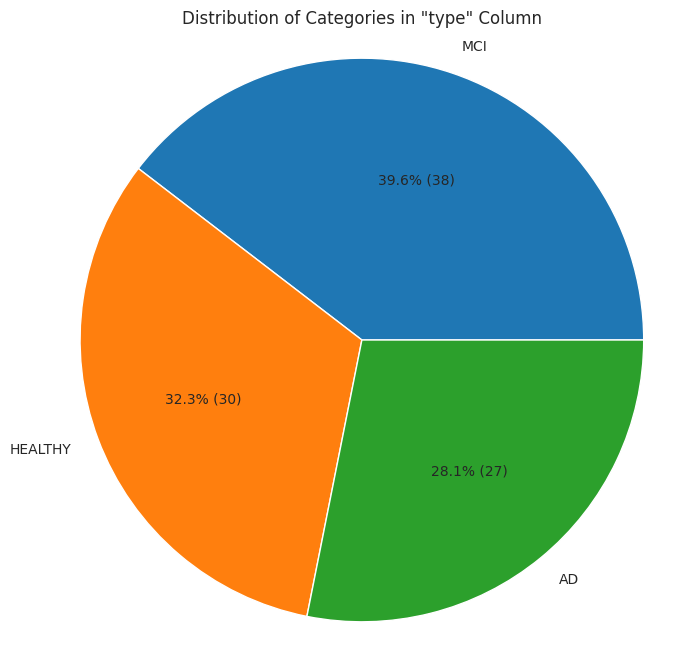

In [62]:
# prompt: I want a pie chart showing the portion and the exact number of categories in type column of df_shortsession

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_shortsession is already loaded as in your provided code.

# Count occurrences of each category in the 'type' column
type_counts = df_shortsession['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(type_counts) / 100)})')
plt.title('Distribution of Categories in "type" Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


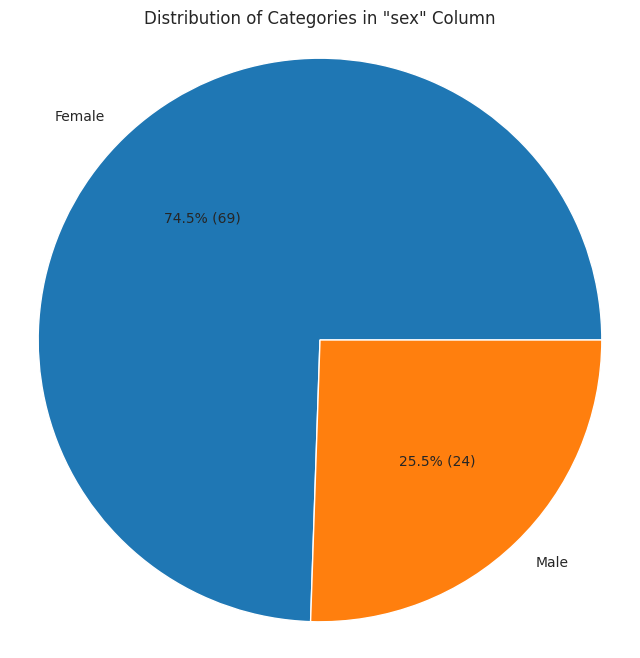

In [67]:
# prompt: I want a pie chart showing the portion and the exact number of categories in sex column of df_shortsession

import matplotlib.pyplot as plt

# Assuming df_shortsession is already loaded as in your provided code.

# Count occurrences of each category in the 'sex' column
sex_counts = df_shortsession['sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(sex_counts) / 100)})')
plt.title('Distribution of Categories in "sex" Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Long Sessions

In [69]:
dir_path = '/content/drive/MyDrive/DemCare/D9'
file_name = 'Long_sessions.csv'
file_path = os.path.join(dir_path,file_name)
df_longsession = pd.read_csv(file_path,sep=';',quotechar='"')
df_longsession

,id,startDate,endDate,birthDate,type,sex
0,32,2014-10-23 09:26:33.864,2014-10-23 09:52:37.837,1934-11-29,AD,Female
1,33,2014-10-23 10:37:27.611,2014-10-23 10:56:50.861,1930-06-23,MCI,NaN
2,35,2014-10-27 10:11:53.655,2014-10-27 10:56:59.709,1928-03-09,AD,Male
3,36,2014-10-27 11:27:21.597,2014-10-27 12:05:08.666,1950-08-22,MCI,Female
4,37,2014-10-27 12:24:13.553,2014-10-27 12:51:06.615,1935-03-24,MCI,Female
...,...,...,...,...,...,...
60,115,2014-12-04 12:28:14.220,2014-12-04 12:45:20.701,1945-08-29,AD,Male
61,125,2014-12-11 10:36:31.917,2014-12-11 10:55:43.956,1948-03-12,MCI,Female
62,126,2014-12-11 11:17:09.163,2014-12-11 11:44:14.135,1954-04-27,MCI,Male
63,130,2014-12-12 12:41:02.480,2014-12-12 13:09:21.714,1954-09-29,MCI,Female


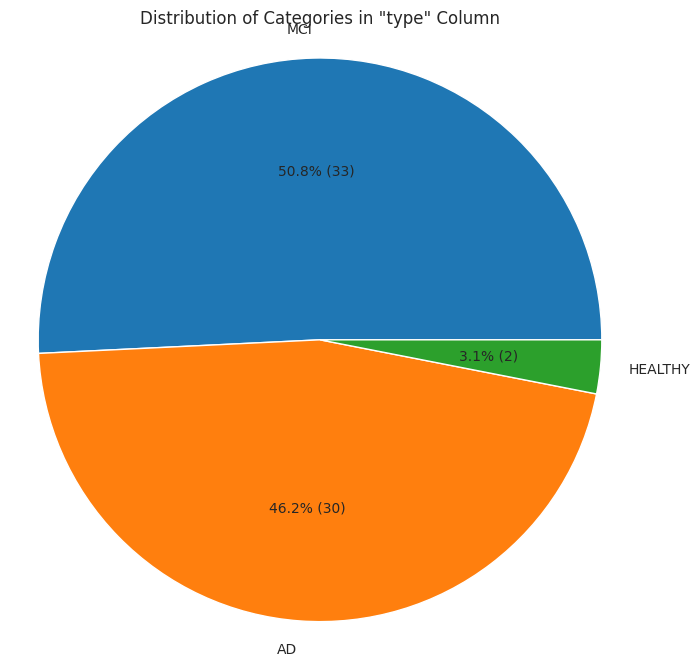

In [70]:
# prompt: I want a pie chart showing the portion and the exact number of categories in type column of df_shortsession
# Assuming df_shortsession is already loaded as in your provided code.

# Count occurrences of each category in the 'type' column
type_counts = df_longsession['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(type_counts) / 100)})')
plt.title('Distribution of Categories in "type" Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


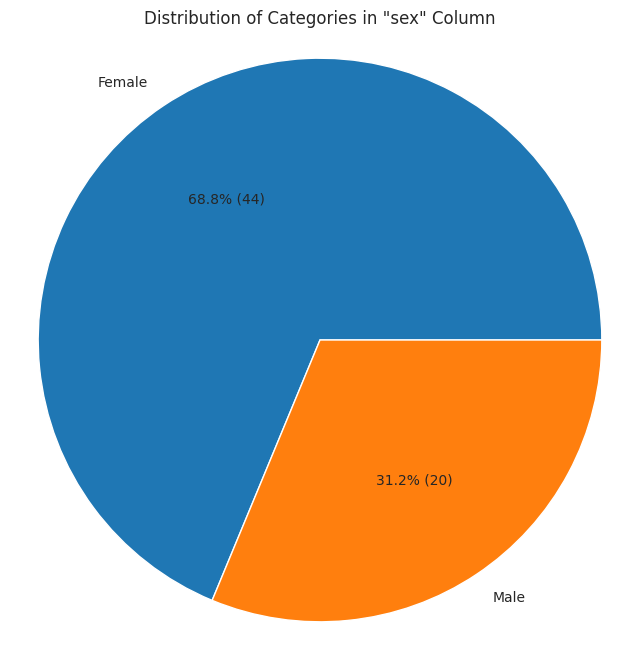

In [71]:
# Assuming df_shortsession is already loaded as in your provided code.

# Count occurrences of each category in the 'sex' column
sex_counts = df_longsession['sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(sex_counts) / 100)})')
plt.title('Distribution of Categories in "sex" Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
